# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [27]:
import numpy as np
import pandas as pd

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# Import your own code
import inauguralproject

from scipy import optimize

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

In [28]:

from inauguralproject import ExchangeEconomyClass

**Explain how you solve the model**

In [29]:
# code for solving the model (remember documentation and comments)
#import module
economy = ExchangeEconomyClass()

#set parameters as in the py-file
par = economy.par

#determine utility of initial endowment
# a. consumer A
utility_init_A = economy.utility_A(economy.par.w1A, economy.par.w2A) #calling utility function in py-file
print(f"The utility of the bundle (x1A = {par.w1A}, x2A = {par.w2A}) is: {utility_init_A:.3f}")

# b. consumer B
utility_init_B = economy.utility_B(economy.par.w1B,economy.par.w2B) #calling utility function in py-file
print(f"The utility of the bundle (x1B = {par.w1B:.1f}, x2B = {par.w2B}) is: {utility_init_B:.3f}")

#create grid for x1a and x2a
N = 75
x1A_val = np.linspace(0,1,N)
x2A_val = np.linspace(0,1,N)

#create a set C
C = []

#loop through grid and append pareto optimal values to C
for x1A in x1A_val:
    for x2A in x2A_val:
        # a. calculate the corresponding consume for B that follows from walras' law:
        x1B = 1-x1A
        x2B = 1-x2A
        # b. calculate utility at every point
        utility_A=economy.utility_A(x1A,x2A)
        utility_B=economy.utility_B(x1B,x2B)
        # c. check if value is pareto
        if utility_A >= utility_init_A and utility_B >= utility_init_B:
            # d. append to C if condition is satisfied
            C.append((x1A,x2A))

The utility of the bundle (x1A = 0.8, x2A = 0.3) is: 0.416
The utility of the bundle (x1B = 0.2, x2B = 0.7) is: 0.304


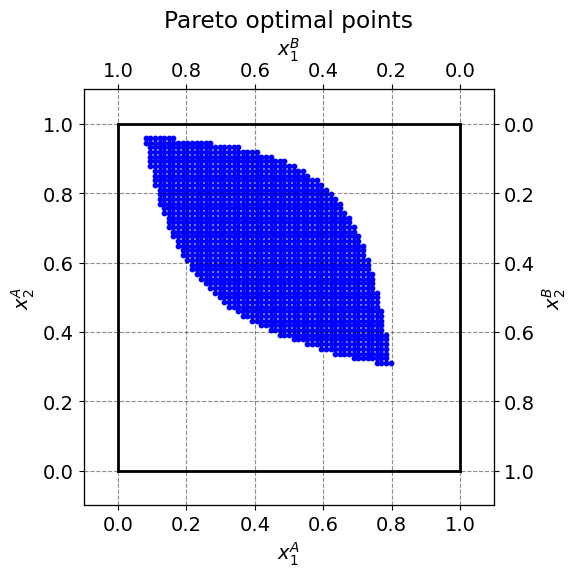

In [30]:
#plot edgeworth box
C = np.array(C)

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax1 = fig.add_subplot(1, 1, 1)

ax1.set_xlabel("$x_1^A$")
ax1.set_ylabel("$x_2^A$")

temp = ax1.twinx()
temp.set_ylabel("$x_2^B$")
ax2 = temp.twiny()
ax2.set_xlabel("$x_1^B$")


# a. plot the pareto set
ax1.scatter(C[:, 0], C[:, 1], s=10, color='blue') 

# c. create title
plt.title('Pareto optimal points')
# d. enable grid for primary axes 
ax1.grid(True)
plt.tight_layout()

# limits
ax1.plot([0,w1bar],[0,0],lw=2,color='black')
ax1.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax1.plot([0,0],[0,w2bar],lw=2,color='black')
ax1.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax1.set_xlim([-0.1, w1bar + 0.1])
ax1.set_ylim([-0.1, w2bar + 0.1])    
ax2.set_xlim([w1bar + 0.1, -0.1])
ax2.set_ylim([w2bar + 0.1, -0.1])

#ax1.legend(frameon=True,loc='lower right',bbox_to_anchor=(1.6,1.0));

plt.show()

#få grid til at være aligned og pænt
#evt. tilføje indifferenskurver... hvordan?
#måske også få denne ind i py-filen

# Question 2

Explain your code and procedure

In [31]:

# Define the price set with an increment of 1/2N
P1 = np.arange(0.5, 2.5+ (1/(N)*2), 1/(N)*2)
print(P1)

#loop over prices in price set
for p1 in P1:
    # a. call the market clearing in the py-file
    epsilon_1, epsilon_2 = economy.check_market_clearing(p1)

print(f'epsilon 1 = {epsilon_1:.3f}, epsilon 2 = {epsilon_2: .3f}')    

[0.5        0.52666667 0.55333333 0.58       0.60666667 0.63333333
 0.66       0.68666667 0.71333333 0.74       0.76666667 0.79333333
 0.82       0.84666667 0.87333333 0.9        0.92666667 0.95333333
 0.98       1.00666667 1.03333333 1.06       1.08666667 1.11333333
 1.14       1.16666667 1.19333333 1.22       1.24666667 1.27333333
 1.3        1.32666667 1.35333333 1.38       1.40666667 1.43333333
 1.46       1.48666667 1.51333333 1.54       1.56666667 1.59333333
 1.62       1.64666667 1.67333333 1.7        1.72666667 1.75333333
 1.78       1.80666667 1.83333333 1.86       1.88666667 1.91333333
 1.94       1.96666667 1.99333333 2.02       2.04666667 2.07333333
 2.1        2.12666667 2.15333333 2.18       2.20666667 2.23333333
 2.26       2.28666667 2.31333333 2.34       2.36666667 2.39333333
 2.42       2.44666667 2.47333333 2.5       ]
epsilon 1 = -0.373, epsilon 2 =  0.933


# Question 3

Explain your code and procedure

In [32]:
# Loop through 
init_guess = 2.5
instance = economy.walras(init_guess, eps=1e-8, maxiter=500)

print(f'At the price p1 = {instance:.3f}, the market for both goods clear, under the conditon that p2 is numeraire')

  0: p1 =   2.12666667 -> excess demand ->    -0.37333333
  1: p1 =   1.79312435 -> excess demand ->    -0.33354232
  2: p1 =   1.50914630 -> excess demand ->    -0.28397804
  3: p1 =   1.28463453 -> excess demand ->    -0.22451178
  4: p1 =   1.12574572 -> excess demand ->    -0.15888881
   ...
 22: p1 =   0.94444445 -> excess demand ->    -0.00000001
At the price p1 = 0.944, the market for both goods clear, under the conditon that p2 is numeraire


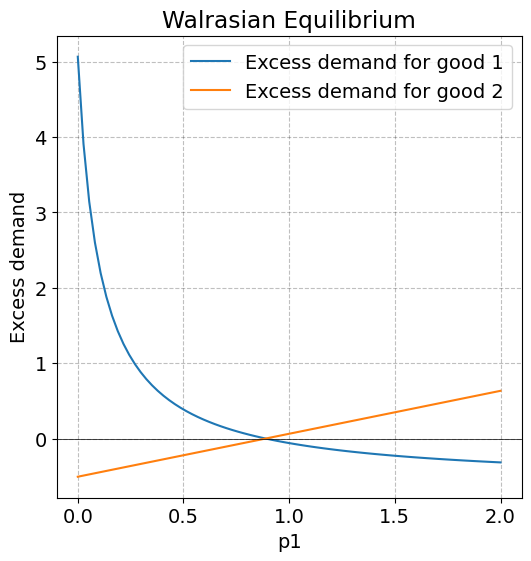

In [33]:
import numpy as np
import matplotlib.pyplot as plt

excess_demands = []
price_range = np.linspace(0.1,2,N)
# Use your instance to calculate excess demand for each price
for p1 in price_range:
    excess_demand = economy.check_market_clearing(p1)
    excess_demands.append(excess_demand)

# Convert the list of tuples into a NumPy array for easy plotting
excess_demands = np.array(excess_demands)

# Plotting
plt.figure(figsize=(6, 6))

# Plot excess demand for good 1
plt.plot(np.linspace(0,2,N), excess_demands[:, 0], label='Excess demand for good 1')

# Plot excess demand for good 2
plt.plot(np.linspace(0,2,N), excess_demands[:, 1],label='Excess demand for good 2')

# Add a horizontal line at zero to indicate market clearing
plt.axhline(0, color='black', linewidth=0.5)

plt.title('Walrasian Equilibrium')
plt.xlabel('p1')
plt.ylabel('Excess demand')
plt.legend()
plt.grid(True)
plt.show()

# Question 4a

In [34]:
# Define empty function to replace with the found solution.
optimal_price=()
optimal_allocation=()
max_utility=float("-inf")

# Loop over all prices in the pricevector 
for p1 in P1:

# CalL on demand function for B
    x1B, x2B=economy.demand_B(p1)

# Make sure that the amount of each good left for A is positive. 
    if 1-x1B > 0 and 1-x2B>0:

        utility_A=economy.utility_A(1-x1B, 1-x2B)

        if utility_A > max_utility:
            max_utility=utility_A
            optimal_price=p1
            optimal_allocation=(1-x1B, 1-x2B)

# Printing the solution
print(f"The optimal price is {optimal_price:.3f}, and the optimal allocation for A is x1={optimal_allocation[0]:.3f} and x2={optimal_allocation[1]:.3f}.")
print(f"Resulting in utility {max_utility:.3f} for A.")

The optimal price is 1.887, and the optimal allocation for A is x1=0.619 and x2=0.641.
Resulting in utility 0.634 for A.


# Question 4b

In [35]:
# When the price can be all positive numbers, we find the optimal price by minimizing the negative utility of A.
# CalL on demand function for B

def uA(p1):
    x1B, x2B=economy.demand_B(p1)
    return economy.utility_A(1-x1B, 1-x2B)

new_price=[1]
obj_func = lambda p1: -uA(p1)

constraint = lambda p1: economy.utility_B(1-x1B, 1-x2B)
constraints = {'type': 'ineq', 'fun': constraint}

res = optimize.minimize(obj_func, new_price ,method='SLSQP', constraints=constraints)
p1_best_scipy=res.x[0]
ua_best_scipy=-res.fun
opt_best_scipy=(1-x1B, 1-x2B)

# Printing the solution
print(f"The optimal price is {p1_best_scipy:.3f}, and the optimal allocation for A is x1={opt_best_scipy[0]:.3f} and x2={opt_best_scipy[1]:.3f}.")
print(f"Resulting in utility {ua_best_scipy:.3f} for A.")

The optimal price is 1.897, and the optimal allocation for A is x1=0.680 and x2=0.600.
Resulting in utility 0.634 for A.


# Questions 5a and 5b

In [36]:
#5a. 
max_utility_A = -np.inf 
best_allocation_A = None

# Loop through all points in the set C
for allocation in C:
    # a. set current utility for A as utility of endowment 
    current_utility_A = economy.utility_A(par.w1A, par.w2A)
    if current_utility_A > max_utility_A:
        max_utility_A = current_utility_A
        best_allocation_A = allocation
a1 = best_allocation_A[0]
a2 = best_allocation_A[1]
print(f'Looping through the set C, the utility is maximised for agent A when x1 = {a1:.3f} and x2 = {a2:.3f} with u = {economy.utility_A(a1,a2):.3f}')

Looping through the set C, the utility is maximised for agent A when x1 = 0.081 and x2 = 0.946 with u = 0.417


In [37]:
#find allocation if choice set is unrestricted, but B must not be worse off than with initial endowment
consumer = ExchangeEconomyClass()
consumer.solve()
print(f'x1 = {result.x[0]:.3f}, x2 = {result.x[1]:.3f}, u = {economy.utility_A(result.x[0],result.x[1]):3f}')


x1 = 0.576, x2 = 0.844, u = 0.743228


# Question 6a 

In [38]:
opt = ExchangeEconomyClass()
opt.solve2()
print(f'the optimal value of x1 = {opt.sol.x1:.3f}, and x2 = {opt.sol.x2:.3f}, at which the utility is u = {opt.sol.u:.3f}')

the optimal value of x1 = 0.333, and x2 = 0.667, at which the utility is u = 0.529


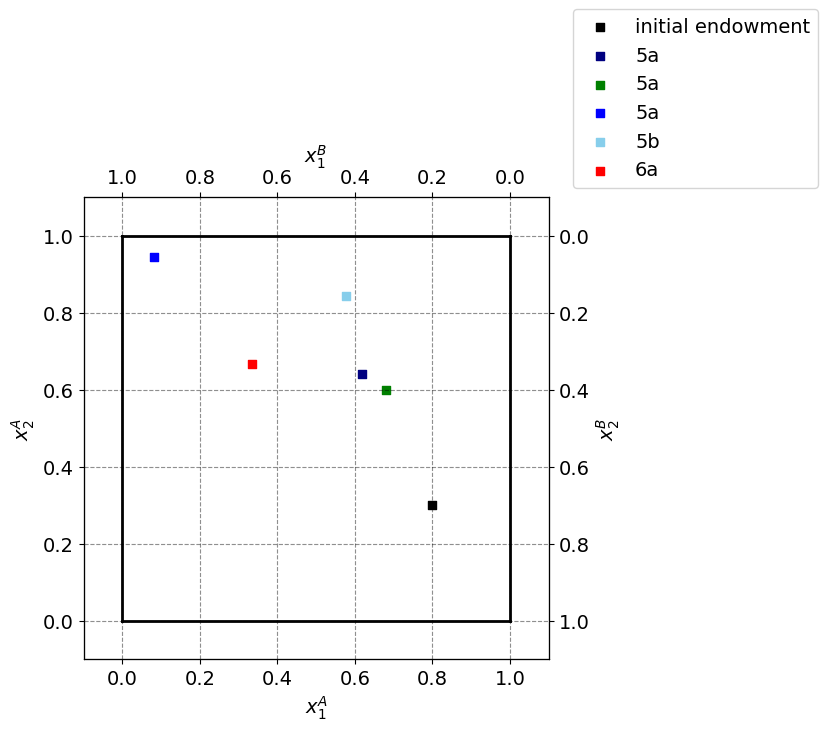

In [39]:

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")


# A
# a. initial endowment
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='initial endowment')

# b. 4a
ax_A.scatter(optimal_allocation[0], optimal_allocation[1], marker='s',color='navy',label='5a')

# c. 4b 
ax_A.scatter(opt_best_scipy[0], opt_best_scipy[1] ,marker='s',color='green',label='5a')

# d. 5a 
ax_A.scatter(a1, a2 ,marker='s',color='blue',label='5a')

# e. 5b
ax_A.scatter(x_1,x_2 ,marker='s',color='skyblue',label='5b')

# f. 6a
ax_A.scatter(opt.sol.x1,opt.sol.x2 ,marker='s',color='red',label='6a')


# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='lower right',bbox_to_anchor=(1.6,1.0));

# Question 7

In [40]:
np.random.seed(2000)
#w1a_uni=np.random.uniform(low=0,high=1,size=50)
#w2a_uni=np.random.uniform(low=0,high=1,size=50)

# Generate 50 pairs of numbers
W_pairs = []
for _ in range(50):
    pair = (np.random.uniform(0, 1), np.random.uniform(0, 1))
    W_pairs.append(pair)

print(W_pairs)


[(0.570517285378466, 0.56452875520484), (0.48844183254450535, 0.3364777534653247), (0.3758681778119588, 0.532035868838685), (0.06810628846711264, 0.5845290601966381), (0.23789776342109814, 0.16075658153974937), (0.15211914914792302, 0.12706921895137258), (0.3274411663720117, 0.6941538730112569), (0.358966469406951, 0.8913656558995818), (0.2018798794246912, 0.11060250345361267), (0.5275567612904862, 0.8676553290111667), (0.2618743783611466, 0.4993951212412697), (0.42856440131602347, 0.5300038886795768), (0.5739468217974663, 0.3918556500474658), (0.07951411536207031, 0.8672810103716965), (0.16450358011567312, 0.8034816208777167), (0.28792824821028573, 0.2685711770720025), (0.7174780154703791, 0.8814056557487058), (0.9921200295448002, 0.4583500369122594), (0.7851292707718505, 0.7386939356252453), (0.47358297821611806, 0.48483470503794013), (0.9330050981122372, 0.7526538389399142), (0.1592888282095748, 0.13481046507080274), (0.4106771736908399, 0.7565362622325277), (0.212513021995953, 0.31

ADD CONCISE CONLUSION.